In [56]:
import pandas as pd
import numpy as np


In [57]:
gini_df = pd.read_csv('GINI.csv')
tax_union_df = pd.read_csv('tax_union_data.csv')
gov_spending_df = pd.read_csv('gov_spending.csv')
unemp_intrate_df = pd.read_csv('OECD_LONGTERM_UNEMPLOYMENT_CLEANED.csv')
pop_gdp_inf_df = pd.read_csv('pop_gdp_inf.csv')


In [58]:
gini_df = gini_df.rename(columns={
    'value': 'GINI',
    'date': 'TIME_PERIOD',
    'country': 'Reference area'
})




unemp_intrate_df = unemp_intrate_df.rename(columns={
    'Country': 'REF_AREA',
    'Year': 'TIME_PERIOD'
})


pop_gdp_inf_df = pop_gdp_inf_df.rename(columns={
    'country': 'REF_AREA',
    'year': 'TIME_PERIOD'
})

In [59]:
tax_union_df

,Unnamed: 0,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate
0,0,2000,Mexico,MEX,16.700001,35.0
1,1,2002,Mexico,MEX,15.500000,35.0
2,2,2005,Mexico,MEX,16.900000,30.0
3,3,2006,Mexico,MEX,16.299999,29.0
4,4,2007,Mexico,MEX,16.700001,28.0
...,...,...,...,...,...,...
662,662,2015,Finland,FIN,67.500000,20.0
663,663,2016,Finland,FIN,65.699997,20.0
664,664,2017,Finland,FIN,62.900002,20.0
665,665,2018,Finland,FIN,60.000000,20.0


In [60]:
megaframe = pd.merge(gini_df, tax_union_df, on=['Reference area', 'TIME_PERIOD'])
megaframe = megaframe.drop(columns='Unnamed: 0', errors='ignore')
megaframe.head()

,Reference area,TIME_PERIOD,GINI,REF_AREA,Trade union density,Combined corporate income tax rate
0,Germany,2019,0.318,DEU,16.299999,29.937781
1,Germany,2018,0.319,DEU,16.600000,29.897059
2,Germany,2017,0.313,DEU,16.700001,29.889263
3,Germany,2016,0.314,DEU,17.000000,29.818844
4,Germany,2015,0.317,DEU,17.600000,29.780475


In [61]:
print("gov_spending_df columns:", gov_spending_df.columns.tolist())
print("megaframe columns:", megaframe.columns.tolist())



gov_spending_df columns: ['Unnamed: 0', 'REF_AREA', 'TIME_PERIOD', 'Education spending', 'Health spending', 'Housing spending', 'Community development spending']
megaframe columns: ['Reference area', 'TIME_PERIOD', 'GINI', 'REF_AREA', 'Trade union density', 'Combined corporate income tax rate']


In [62]:



print("gov_spending_df columns:", gov_spending_df.columns.tolist())
print("megaframe columns:", megaframe.columns.tolist())


megaframe = pd.merge(megaframe, gov_spending_df, on=['REF_AREA', 'TIME_PERIOD'], how='left')


gov_spending_df columns: ['Unnamed: 0', 'REF_AREA', 'TIME_PERIOD', 'Education spending', 'Health spending', 'Housing spending', 'Community development spending']
megaframe columns: ['Reference area', 'TIME_PERIOD', 'GINI', 'REF_AREA', 'Trade union density', 'Combined corporate income tax rate']


In [63]:
megaframe.drop(columns=['Unnamed: 0'], inplace=True)

megaframe

,Reference area,TIME_PERIOD,GINI,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending
0,Germany,2019,0.318,DEU,16.299999,29.937781,0.042956,0.071568,0.002983,0.001955
1,Germany,2018,0.319,DEU,16.600000,29.897059,0.041819,0.070343,0.003190,0.001951
2,Germany,2017,0.313,DEU,16.700001,29.889263,0.040998,0.069846,0.003434,0.001848
3,Germany,2016,0.314,DEU,17.000000,29.818844,0.041148,0.070509,0.003395,0.001930
4,Germany,2015,0.317,DEU,17.600000,29.780475,0.041602,0.070424,0.003029,0.001948
...,...,...,...,...,...,...,...,...,...,...
56,United States,2004,0.403,USA,12.000000,39.316000,0.062538,0.072902,NaN,NaN
57,United States,2003,0.408,USA,12.400000,39.322500,0.063286,0.071682,NaN,NaN
58,United States,2002,0.404,USA,12.800000,39.296500,0.063600,0.069754,NaN,NaN
59,United States,2001,0.406,USA,12.900000,39.270500,0.062989,0.066057,NaN,NaN


In [64]:
unemp_intrate_df.rename(columns={'Country': 'REF_AREA'}, inplace=True)
megaframe = pd.merge(megaframe, unemp_intrate_df, on=['REF_AREA', 'TIME_PERIOD'], how='left')

megaframe

,Reference area,TIME_PERIOD,GINI,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP
0,Germany,2019,0.318,DEU,16.299999,29.937781,0.042956,0.071568,0.002983,0.001955,-0.253634,2.975000
1,Germany,2018,0.319,DEU,16.600000,29.897059,0.041819,0.070343,0.003190,0.001951,0.396364,3.208333
2,Germany,2017,0.313,DEU,16.700001,29.889263,0.040998,0.069846,0.003434,0.001848,0.316336,3.566667
3,Germany,2016,0.314,DEU,17.000000,29.818844,0.041148,0.070509,0.003395,0.001930,0.091499,3.908333
4,Germany,2015,0.317,DEU,17.600000,29.780475,0.041602,0.070424,0.003029,0.001948,0.495194,4.366667
...,...,...,...,...,...,...,...,...,...,...,...,...
56,United States,2004,0.403,USA,12.000000,39.316000,0.062538,0.072902,NaN,NaN,4.274167,5.533333
57,United States,2003,0.408,USA,12.400000,39.322500,0.063286,0.071682,NaN,NaN,4.015000,5.991667
58,United States,2002,0.404,USA,12.800000,39.296500,0.063600,0.069754,NaN,NaN,4.610833,5.775000
59,United States,2001,0.406,USA,12.900000,39.270500,0.062989,0.066057,NaN,NaN,5.017500,4.733333


In [65]:
pop_gdp_inf_df.rename(columns={'country': 'REF_AREA','year': 'TIME_PERIOD'}, inplace=True)


megaframe = pd.merge(megaframe, pop_gdp_inf_df, on=['REF_AREA', 'TIME_PERIOD'], how='left')
megaframe.drop(columns=['Unnamed: 0'], inplace=True)
megaframe

,Reference area,TIME_PERIOD,GINI,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP,"Population, total",GDP per capita (current US$),"Inflation, consumer prices (annual %)"
0,Germany,2019,0.318,DEU,16.299999,29.937781,0.042956,0.071568,0.002983,0.001955,-0.253634,2.975000,25334826.0,54972.701789,1.610768
1,Germany,2018,0.319,DEU,16.600000,29.897059,0.041819,0.070343,0.003190,0.001951,0.396364,3.208333,24963258.0,57196.422078,1.911401
2,Germany,2017,0.313,DEU,16.700001,29.889263,0.040998,0.069846,0.003434,0.001848,0.316336,3.566667,24592588.0,53901.714539,1.948647
3,Germany,2016,0.314,DEU,17.000000,29.818844,0.041148,0.070509,0.003395,0.001930,0.091499,3.908333,24190907.0,49888.041084,1.276991
4,Germany,2015,0.317,DEU,17.600000,29.780475,0.041602,0.070424,0.003029,0.001948,0.495194,4.366667,23815995.0,56739.026535,1.508367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,United States,2004,0.403,USA,12.000000,39.316000,0.062538,0.072902,NaN,NaN,4.274167,5.533333,19932722.0,30836.730682,2.343255
57,United States,2003,0.408,USA,12.400000,39.322500,0.063286,0.071682,NaN,NaN,4.015000,5.991667,19720737.0,23718.133850,2.732596
58,United States,2002,0.404,USA,12.800000,39.296500,0.063600,0.069754,NaN,NaN,4.610833,5.775000,19495210.0,20301.843171,2.981575
59,United States,2001,0.406,USA,12.900000,39.270500,0.062989,0.066057,NaN,NaN,5.017500,4.733333,19274701.0,19695.729738,4.407135


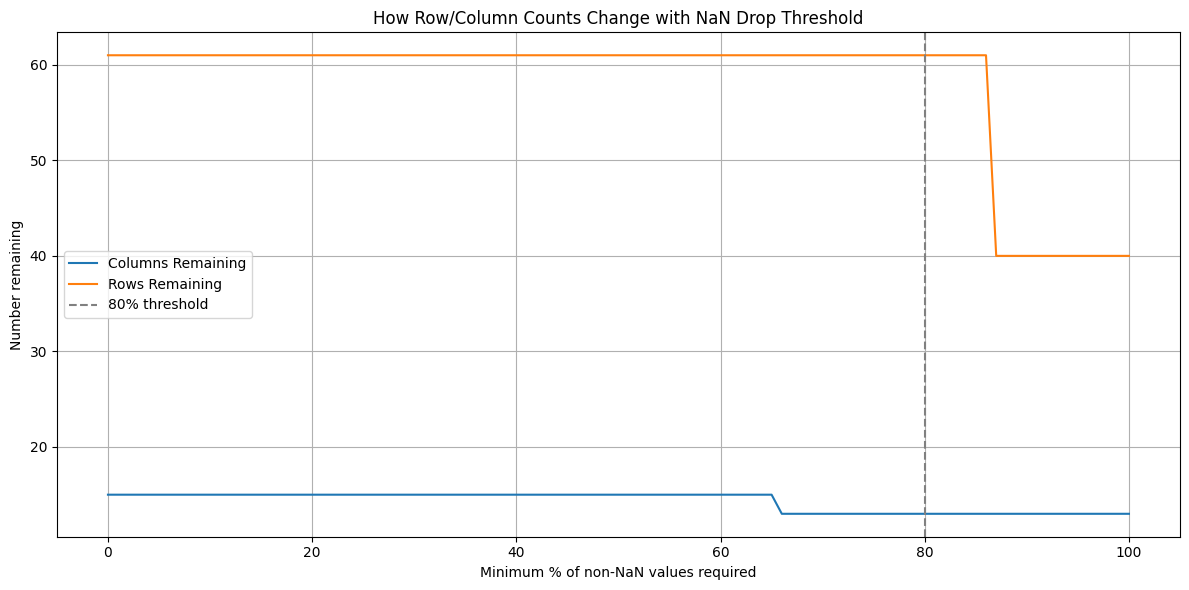

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume 'megaframe' is your working DataFrame

# 1. Percentage of non-NaN values per column
col_non_nan_pct = megaframe.notna().mean()

# 2. Percentage of non-NaN values per row
row_non_nan_pct = megaframe.notna().mean(axis=1)

# 3. Thresholds to evaluate (from 0 to 1)
thresholds = np.linspace(0, 1, 101)

# 4. How many columns/rows would remain at each threshold?
cols_remaining = [(col_non_nan_pct >= t).sum() for t in thresholds]
rows_remaining = [(row_non_nan_pct >= t).sum() for t in thresholds]

# 5. Plot
plt.figure(figsize=(12, 6))
plt.plot(thresholds * 100, cols_remaining, label='Columns Remaining')
plt.plot(thresholds * 100, rows_remaining, label='Rows Remaining')
plt.axvline(x=80, color='gray', linestyle='--', label='80% threshold')
plt.xlabel('Minimum % of non-NaN values required')
plt.ylabel('Number remaining')
plt.title('How Row/Column Counts Change with NaN Drop Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
col_thresh = 0.8
megaframe = megaframe.loc[:, megaframe.notna().mean() >= col_thresh]
megaframe

,Reference area,TIME_PERIOD,GINI,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,IRLT,UNEMP,"Population, total",GDP per capita (current US$),"Inflation, consumer prices (annual %)"
0,Germany,2019,0.318,DEU,16.299999,29.937781,0.042956,0.071568,-0.253634,2.975000,25334826.0,54972.701789,1.610768
1,Germany,2018,0.319,DEU,16.600000,29.897059,0.041819,0.070343,0.396364,3.208333,24963258.0,57196.422078,1.911401
2,Germany,2017,0.313,DEU,16.700001,29.889263,0.040998,0.069846,0.316336,3.566667,24592588.0,53901.714539,1.948647
3,Germany,2016,0.314,DEU,17.000000,29.818844,0.041148,0.070509,0.091499,3.908333,24190907.0,49888.041084,1.276991
4,Germany,2015,0.317,DEU,17.600000,29.780475,0.041602,0.070424,0.495194,4.366667,23815995.0,56739.026535,1.508367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,United States,2004,0.403,USA,12.000000,39.316000,0.062538,0.072902,4.274167,5.533333,19932722.0,30836.730682,2.343255
57,United States,2003,0.408,USA,12.400000,39.322500,0.063286,0.071682,4.015000,5.991667,19720737.0,23718.133850,2.732596
58,United States,2002,0.404,USA,12.800000,39.296500,0.063600,0.069754,4.610833,5.775000,19495210.0,20301.843171,2.981575
59,United States,2001,0.406,USA,12.900000,39.270500,0.062989,0.066057,5.017500,4.733333,19274701.0,19695.729738,4.407135


In [ ]:
megaframe = megaframe.dropna()

megaframe
# megaframe.to_csv('megaframe_cleaned.csv', index=False)